# 00. Table of contents

- Importing libraries and data
- Data cleaning
- Data prep for regression analysis
- Regression analysis: GDP per Capita vs. Daily mean of drug residue in wastewater

# 01. Importing libraries and data

In [55]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
# ensuring that the graphs created are displayed within the notebook without the need to "call" them specifically
%matplotlib inline

In [57]:
#importing dataset
path = r'C:\Users\viki\Documents\Data Analytics\Immersion\Achievement 6\02_Data'
df= pd.read_csv(os.path.join(path, 'Prepared_Data', 'merged_cleaned_dataset_with_gdp.csv'))

# 02. Data Cleaning

In [58]:
df.columns

Index(['year', 'metabolite', 'SiteID', 'Country', 'City', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Weekday mean', 'Weekend mean', 'Daily mean', 'latitude', 'longitude',
       'population', 'Country Name', 'GDP per Capita(USD)', 'GDP category'],
      dtype='object')

In [59]:
df.shape

(2569, 21)

In [60]:
df.isnull().sum()

year                     0
metabolite               0
SiteID                   0
Country                  0
City                     0
Wednesday               18
Thursday                46
Friday                  32
Saturday                23
Sunday                  36
Monday                  36
Tuesday                 34
Weekday mean             1
Weekend mean             0
Daily mean               0
latitude                 0
longitude                0
population               0
Country Name           344
GDP per Capita(USD)    344
GDP category           344
dtype: int64

In [61]:
# we will conduct regression analysis for Daily mean vs. GDP per Capita
# GDP data for year 2021 was not available, so we remove those observations
df.dropna(subset= ['GDP per Capita(USD)'], inplace=True) 

In [62]:
df.isnull().sum()

year                    0
metabolite              0
SiteID                  0
Country                 0
City                    0
Wednesday              12
Thursday               19
Friday                 28
Saturday               19
Sunday                 32
Monday                 32
Tuesday                22
Weekday mean            0
Weekend mean            0
Daily mean              0
latitude                0
longitude               0
population              0
Country Name            0
GDP per Capita(USD)     0
GDP category            0
dtype: int64

We will explore the relationship of the variables "GDP per Capita" and "Daily mean". We cleaned the missing values from the first variable. The "daily mean" has several 0 values but this is a valid value: values below the method limit of quantification of residues are indicated as zero.

In [63]:
df.shape

(2225, 21)

In [65]:
#checking for duplicates
dups = df.duplicated()


In [66]:
dups.shape # No dups

(2225,)

C:\Users\viki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily mean', ylabel='Density'>

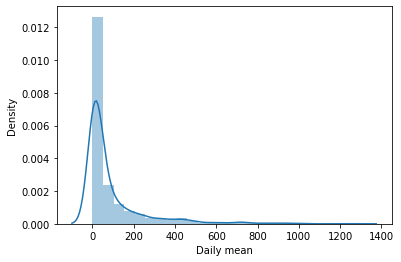

In [67]:
#extreme values check
sns.distplot(df['Daily mean'], bins=25)


In [68]:
df['Daily mean'].mean() # Check the mean

88.60574831460673

In [69]:
df['Daily mean'].median() # Check the median

25.67

In [70]:
df['Daily mean'].max() # Check the max value

1275.66

We do have extreme values but we wont remove them as these are valid measured values. We will conduct the regression analysis with these included.

# 03. Data prep for regression analysis 

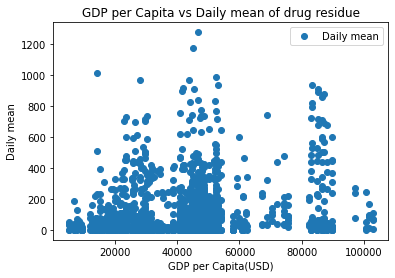

In [71]:
# Creating a scatterplot using matplotlib 

df.plot(x = 'GDP per Capita(USD)', y='Daily mean',style='o')
plt.title('GDP per Capita vs Daily mean of drug residue')  
plt.xlabel('GDP per Capita(USD)')  
plt.ylabel('Daily mean')  
plt.show()

We explored a weak relationship in the earlier exercise between these two variables and we form now the following hypothesis:
If a country have a higher income (GDP per Capita) then the drug usage increases (daily mean of measured drug residue)

In [75]:
# Reshaping the variables into NumPy arrays and putting them into separate objects.
X = df['GDP per Capita(USD)'].values.reshape(-1,1)
y = df['Daily mean'].values.reshape(-1,1)

In [76]:
X

array([[48588.65938],
       [48588.65938],
       [48588.65938],
       ...,
       [60755.75955],
       [60755.75955],
       [60755.75955]])

In [77]:
y

array([[ 29.27],
       [ 50.69],
       [138.22],
       ...,
       [  2.63],
       [  0.  ],
       [  2.93]])

In [78]:
# Splitting data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 03. Regression analysis

In [79]:
# Creating a regression object
regression = LinearRegression()

In [80]:
# Fitting the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [81]:
# Predicting the values of y using X
y_predicted = regression.predict(X_test)

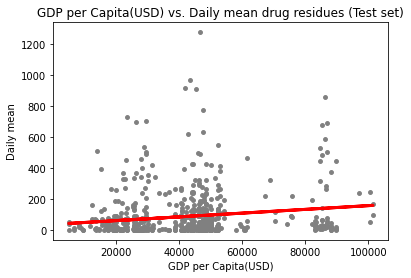

In [82]:
# Creating a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP per Capita(USD) vs. Daily mean drug residues (Test set)')
plot_test.xlabel('GDP per Capita(USD)')
plot_test.ylabel('Daily mean')
plot_test.show()

Here we can see the weak positive relationship, the trend line isn’t very steep, and there are many points far away from this line: there’s a great degree of variability. Our model does not seem to be a great fit.

In [83]:
# Creating objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [84]:
# Printing the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00120919]]
Mean squared error:  23017.1828235203
R2 score:  0.0033108054621578953


The summary statistics also suggest our model not being a good fit.
- slope is almost zero: meaning if GDP rises, daily mean drug residue hardly increases.
- Mean squared error is huge: regression line is not close to the datapoints, meaning it is not accurate
- R2: almost zero also suggesting a very poor fit

In [85]:
# checking array of predeicted values
y_predicted

array([[ 60.65282269],
       [ 69.76285115],
       [ 94.5574391 ],
       [ 96.24416704],
       [ 57.71716293],
       [ 55.46056356],
       [ 67.06971855],
       [ 72.41632098],
       [ 61.88256814],
       [ 89.69329538],
       [ 94.65433504],
       [ 69.76285115],
       [ 64.19135295],
       [ 68.41611609],
       [ 54.73533434],
       [ 96.14594331],
       [ 59.72730716],
       [ 97.95691035],
       [ 94.65433504],
       [ 71.43676575],
       [ 94.65433504],
       [ 98.9095536 ],
       [ 67.7715268 ],
       [ 67.2799993 ],
       [ 85.28663898],
       [ 60.04456088],
       [ 52.18010903],
       [ 93.02822542],
       [ 64.30936338],
       [ 66.82717124],
       [140.15999158],
       [ 96.55504922],
       [ 94.65433504],
       [ 91.62812679],
       [ 99.05661991],
       [ 96.29768537],
       [ 88.67931048],
       [ 91.62812679],
       [ 59.37055537],
       [ 67.06971855],
       [ 89.14419221],
       [ 88.67931048],
       [ 50.84812176],
       [ 91

In [86]:
# Creating a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(20)

,Actual,Predicted
0,185.67,60.652823
1,0.00,69.762851
2,0.00,94.557439
3,84.42,96.244167
4,13.99,57.717163
5,131.86,55.460564
6,83.94,67.069719
7,0.00,72.416321
8,4.85,61.882568
9,0.00,89.693295


As we compared above the actual values with the predicted values by the model, we can also see that the values are not even close.
Also the summary statistic and the chart where we put our regression line over the test dataset provide an obvious result, that the model is not a good fit. We cannot validate our hypothesis that the higher income a country has, the higher drug consumption is present in the country. There must be a more complex combination of factors that would explain the difference in the amount of drug usage between countries in Europe.

We have on the other side some bias in our data: although we have quite many observations (over 2000), the data does not cover all European countries, we could get a better overview of the relationship of the two variables if we had data from all European countrie(or at least most of them). In this analysis we also did not differentiate between the different metabolites, but if we did, we would have a significantly smaller dataset which causes further bias in the analysis.